## Exploratory Data Analysis: Data Visualization

#### Learn to explore a dataset by visualizing the data


### Introduction
Data visualization is an important component of Exploratory Data Analysis (EDA) because it allows a data analyst to "look at" their data and get to know the variables and relationships between them. In order to choose and design a data visualization, it is important to consider two things:
- The question you want to answer (and how many variables that question involves).
- The data that is available (is it quantitative or categorical?)

n this article, we’ll use data visualization to explore a [dataset from StreetEasy](https://github.com/Codecademy/datasets/tree/master/streeteasy), which contains information about housing rentals in New York City. The first few rows of the dataset are printed below (note that we have subsetted the original data for the purposes of this article):

In [6]:
import pandas as pd

In [7]:
rentals = pd.read_csv('streeteasy.csv')
print(df.head())

   rental_id  building_id   rent  bedrooms  bathrooms  size_sqft  \
0       1545     44518357   2550       0.0          1        480   
1       2472     94441623  11500       2.0          2       2000   
2      10234     87632265   3000       3.0          1       1000   
3       2919     76909719   4500       1.0          1        916   
4       2790     92953520   4795       1.0          1        975   

   min_to_subway  floor  building_age_yrs  no_fee  has_roofdeck  \
0              9    2.0                17       1             1   
1              4    1.0                96       0             0   
2              4    1.0               106       0             0   
3              2   51.0                29       0             1   
4              3    8.0                31       0             0   

   has_washer_dryer  has_doorman  has_elevator  has_dishwasher  has_patio  \
0                 0            0             1               1          0   
1                 0            0  

### Univariate analisys
Univariate analysis focuses on a single variable at a time. Univariate data visualizations can help us answer questions like:
- What is the typical price of a rental in New York City?
- What proportion of NYC rentals have a gym?

Depending on the type of the variable (quantitative or categorical) we want to visualize, we need to use slightly different visualizations.

#### Quantitative variables
Box plots (or violin plots) or histograms are common choices for visually summarizing a quantitative variable. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (eg., skew or multimodality).

For example, suppose we are interested in learning more about the price of apartments in NYC. A good starting place in to plot a box plot of the `rent` variable.

<AxesSubplot: xlabel='rent'>

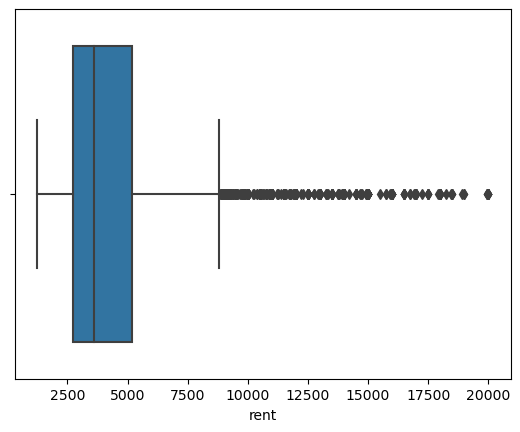

In [8]:
# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.boxplot(x='rent', data=rentals)

We can see that most rental prices fall within a range of $2500-$5000; however, there are many outliers, particularly on the high end. For more detail, we can also plot a histogram of the `rent` variable.

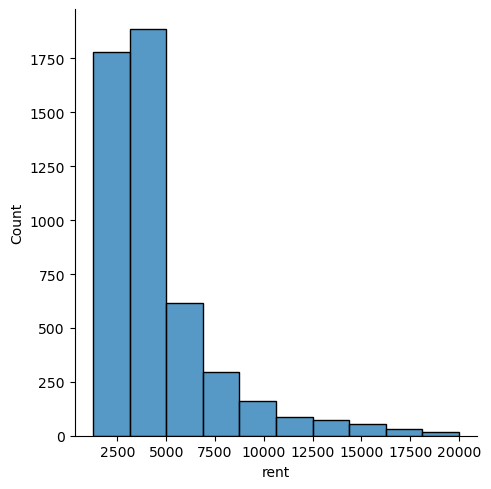

In [9]:
# Create a histogram of the rent variable
sns.displot(rentals.rent, bins=10, kde=False)
plt.show()

The histogram highlights the long right-handed tail for rental prices. We can get a more detailed look at this distribution by increasing the number of bins:

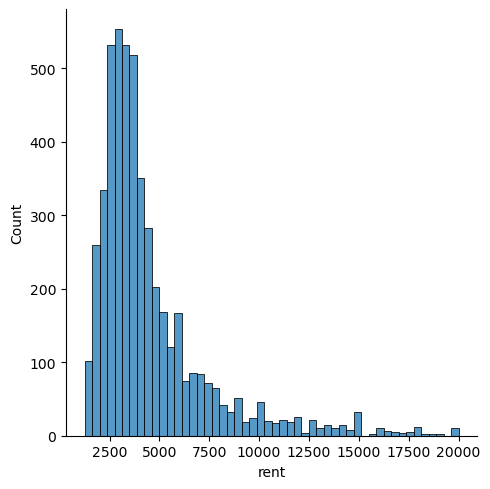

In [10]:
# Create a histogram of the rent variable
sns.displot(rentals.rent, bins=50, kde=False)
plt.show()

#### Categorical variables
For categorical variables, we can use a bar plot (instead of a histogram) to quickly visualize the frequency (or proportion) of values in each category. For, example, suppose we want to know how many apartments are available in each borough. We can visually represent that information as follows:

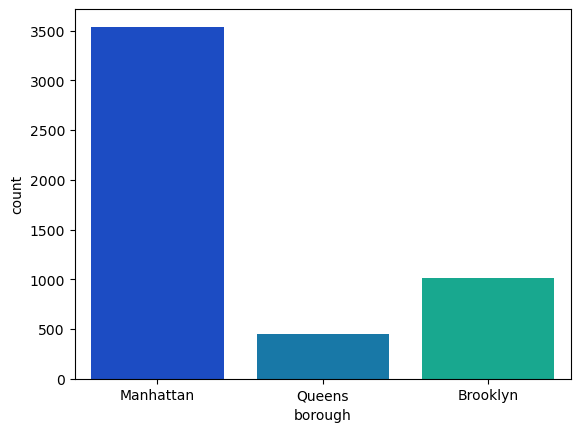

In [11]:
# Create a bar plot of the counts in the borough variable
# The palette parameter will set the color scheme for the plot
sns.countplot(x='borough', data=rentals, palette='winter')
plt.show()

Alternatively, we could use a pie chart to communicate the same information:

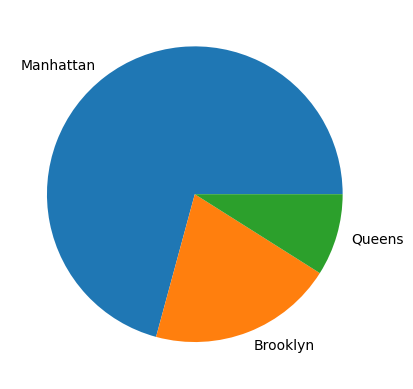

In [12]:
# Define the labels in pie chart
borough_labels = ['Manhattan', 'Brooklyn', 'Queens']

# Generate pie chart of boroughs
plt.pie(rentals.borough.value_counts(), labels=borough_labels)
plt.show()

In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie. For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.

### Bivariate analysis
In many cases, a data analyst is interested in the relationship between two variables in a dataset. For example:
- Do apartments in different boroughs tend to cost different amounts?
- What is the relationship between the area of an apartment and how much it costs?

Depending on the types of variables we are interested in, we need to rely on different kinds of visualizations.